# Hospital readmission for diabetic patients

## Problem description

Readmission within 30 days after hospitalization indicates that inadequate treatment was provided to the patient during his time at the hospital. Hospital readmissions cost a lot to the healthcare system and one solution is to provide additional assistance to patients with high risk of readmission. Furthermore, patients affected with diabetes are more subjected to readmissions than other medical conditions and we will therefore focus on this population in the scope of this project. 

The goal of this project is to predict if a patient with diabetes will be readmitted within 30 days after hospitalization.

The dataset used here represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes.

The dataset can be found in https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008 and is taken from -- _Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014._ --

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
#Loading the dataset
df = pd.read_csv('Diabetes/diabetic_data.csv')

In [3]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

Comparing the dataset description and the number of columns described above, we suppose that most of our columns are categorical. We will treat numerical and categorical columns separately. Let's see.

In [4]:
#We look at the number of columns we have
print(len(df.columns), 'columns')

50 columns


So we have 50 columns, including the target variable. Let's investiguate each one individually.

## Data preparation and analysis

In [5]:
#For each column, we look at the number of unique instances to better understand the information contained in them
for col in df.columns:
    unique = df[col].unique()
    if (len(unique)<11):
        print(col,": ",unique)
    else:
        print(col,": ", len(unique), " number of unique values")

encounter_id :  101766  number of unique values
patient_nbr :  71518  number of unique values
race :  ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender :  ['Female' 'Male' 'Unknown/Invalid']
age :  ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight :  ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id :  [6 1 2 3 4 5 8 7]
discharge_disposition_id :  26  number of unique values
admission_source_id :  17  number of unique values
time_in_hospital :  14  number of unique values
payer_code :  18  number of unique values
medical_specialty :  73  number of unique values
num_lab_procedures :  118  number of unique values
num_procedures :  [0 5 1 6 2 3 4]
num_medications :  75  number of unique values
number_outpatient :  39  number of unique values
number_emergency :  33  number of unique values
number_inpatient :  21  number of unique values
diag_

From this, we see that we can already drop **encounter_id** and **patient_nbr** as these are identifiers and provide no useful information in the scope of the problem. We can also drop **examide** and **citoglipton** columns as they only contain one value and will be of no discriminating use.

In [6]:
#Let's drop the unnecessary columns
df.drop(['encounter_id', 'patient_nbr', 'examide', 'citoglipton'], axis=1, inplace = True)

Let's now look at our target variable, **readmitted**.

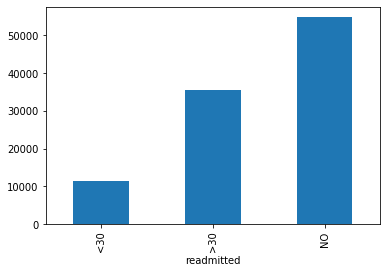

In [7]:
df.groupby('readmitted').size().plot(kind='bar')

The goal of this project will be to predict if someone will be readmitted within 30 days (1) or not (0). Let's transform our target variable accordingly.

In [8]:
#We create a new column with 1 if the value is readmitted within 30 days and 0 if not
df['label'] = pd.Series([1 if val == '<30' else 0 for val in df['readmitted']], index=df.index)

In [9]:
#We drop the previous column as we will use the other one for the classification problem
df.drop(['readmitted'], axis=1, inplace = True)

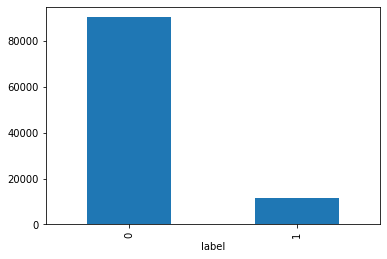

In [10]:
#We visualize our target variable after transformations
df.groupby('label').size().plot(kind='bar')

We see that we are facing with an imbalanced dataset. This is something we sould pay attention to when modeling our data. Now let's look at our numerical columns.

In [11]:
#Extract the numerical columns
num_columns = df.select_dtypes(include=np.number).columns.tolist()
num_columns

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'label']

From the attached file with mode information on the data, the IDs_mapping file, we see that **admission_type_id**, **discharge_disposition_id** and **admission_source_id** are actually categorical data that were mapped to ID values, so we should treat them as categorical. Let's create a special array for them.

In [12]:
#We separate our numerical columns into the features, the target and those that are actually categorical
num_cat_columns = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
label_column = num_columns[11]
num_columns = num_columns[3:11]

By looking again at the IDs_mapping file, we see that we can already discard patients that were discharged because of death (**discharge_disposition_id** 11, 19, 20, 21) or because they were admitted to an hospice (**discharge_disposition_id** 13, 14), hence terminally illness cares, as they won't be suggested to readmission. 

In [13]:
df = df[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

Now we look at the categorical columns and those containing missing values (no numerical column contained missing values). 

In [14]:
cat_columns = df.select_dtypes(exclude=np.number).columns.tolist()
for col in num_cat_columns:
    cat_columns.append(col)
cat_columns

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

In [15]:
#Look at columns with missing values
#Replace missing values
df = df.replace('?', np.nan)
#Identification of columns containing missing values
null_col = df.columns[df.isnull().any()].tolist()

In [16]:
df[null_col].describe()

race    weight payer_code medical_specialty diag_1 diag_2 diag_3
count       97109      3125      59945             50727  99323  98987  97924
unique          5         9         17                72    715    747    786
top     Caucasian  [75-100)         MC  InternalMedicine    428    276    250
freq        74220      1312      31333             14237   6663   6589  11466

Let's look at all the features we have; **weight** is dropped because it contains 97% of missing values and
**payer_code** is dropped as well because it contains 40% of missing values and is not considered important in the scope of the problem. 

**medical specialty**, **primary diagnosis**, **secondary diagnosis** and **tertiary diagnosis** contain a lot of different categorical variables. Grouping in similar diagnosis/medical specialty is therefore necessary otherwise each category will be present in smaller number of samples and hence, individually, would not significantly represent the data and might receive a lower importance weight, *from [Bhuvan M S, Ankit Kumar, Adil Zafar, Vinith Kishore 'Identifying Diabetic Patients with High Risk of Readmission'](https://arxiv.org/pdf/1602.04257.pdf)'s idea*. The group for the diagnosis are given [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3996476/table/tab2/).

In [17]:
df.drop(['weight', 'payer_code'], axis=1, inplace = True)
#We store the remaining categorical columns in our categorical columns array
cat_columns = df.select_dtypes(exclude=np.number).columns.tolist()
for col in num_cat_columns:
    cat_columns.append(col)

In [18]:
#Let's group values into groups given by the paper the dataset is taken from 
val_Circulatory = []
for e in range(390,460):
    val_Circulatory.append(str(e))
val_Circulatory.append('785')

val_Respiratory = []
for e in range(460,520):
    val_Respiratory.append(str(e))
val_Respiratory.append('786')

val_Digestive = []
for e in range(520,580):
    val_Digestive.append(str(e))
val_Digestive.append('787')

val_Injury = []
for e in range(800,1000):
    val_Injury.append(str(e))
    
val_Musculoskeletal = []
for e in range(710,740):
    val_Musculoskeletal.append(str(e))

val_Genitourinary = []
for e in range(580,630):
    val_Genitourinary.append(str(e))
val_Genitourinary.append('788')

val_Neoplasms = []
for e in range(140,240):
    val_Neoplasms.append(str(e))

In [19]:
df['diag_1'] = pd.Series(['Diabetic' if '250' in str(val) 
                          else 'Circulatory' if str(val) in val_Circulatory 
                          else 'Respiratory' if str(val) in val_Respiratory
                          else 'Digestive' if str(val) in val_Digestive
                          else 'Injury' if str(val) in val_Injury
                          else 'Musculoskeletal' if str(val) in val_Musculoskeletal
                          else 'Genitourinary' if str(val) in val_Genitourinary
                          else 'Neoplasms' if str(val) in val_Neoplasms
                          else 'Others' for val in df['diag_1']], index=df.index)

In [20]:
df['diag_2'] = pd.Series(['Diabetic' if '250' in str(val) 
                          else 'Circulatory' if str(val) in val_Circulatory 
                          else 'Respiratory' if str(val) in val_Respiratory
                          else 'Digestive' if str(val) in val_Digestive
                          else 'Injury' if str(val) in val_Injury
                          else 'Musculoskeletal' if str(val) in val_Musculoskeletal
                          else 'Genitourinary' if str(val) in val_Genitourinary
                          else 'Neoplasms' if str(val) in val_Neoplasms
                          else 'Others' for val in df['diag_2']], index=df.index)

In [21]:
df['diag_3'] = pd.Series(['Diabetic' if '250' in str(val) 
                          else 'Circulatory' if str(val) in val_Circulatory 
                          else 'Respiratory' if str(val) in val_Respiratory
                          else 'Digestive' if str(val) in val_Digestive
                          else 'Injury' if str(val) in val_Injury
                          else 'Musculoskeletal' if str(val) in val_Musculoskeletal
                          else 'Genitourinary' if str(val) in val_Genitourinary
                          else 'Neoplasms' if str(val) in val_Neoplasms
                          else 'Others' for val in df['diag_3']], index=df.index)

In [22]:
#For the missing values, we replace them with 'Not provided' to create a new category
df['medical_specialty'] = df['medical_specialty'].fillna('Not provided')

In [23]:
#We look at the top 10 most represented medical specialties in the dataset and we create a 'Others' category for the specialties not included in the top 10
df.groupby('medical_specialty').size().sort_values(ascending=False)
top_10 = ['Not provided','InternalMedicine', 'Emergency/Trauma', 'Family/GeneralPractice', 'Cardiology', 'Surgery-General','Nephrology','Orthopedics','Orthopedics-Reconstructive','Radiologist']
df['medical_specialty'] = pd.Series([val if val in top_10 else 'Others' for val in df['medical_specialty']], index=df.index)

In [24]:
#For the missing values, we replace them with 'Not provided' to create a new category
df['race'] = df['race'].fillna('Not provided')

We now investigate the rest of the categorical columns.

In [25]:
for col in cat_columns:
    u = df[col].unique()
    print (col, ': ', len(u), 'unique values')

race :  6 unique values
gender :  3 unique values
age :  10 unique values
medical_specialty :  11 unique values
diag_1 :  9 unique values
diag_2 :  9 unique values
diag_3 :  9 unique values
max_glu_serum :  4 unique values
A1Cresult :  4 unique values
metformin :  4 unique values
repaglinide :  4 unique values
nateglinide :  4 unique values
chlorpropamide :  4 unique values
glimepiride :  4 unique values
acetohexamide :  2 unique values
glipizide :  4 unique values
glyburide :  4 unique values
tolbutamide :  2 unique values
pioglitazone :  4 unique values
rosiglitazone :  4 unique values
acarbose :  4 unique values
miglitol :  4 unique values
troglitazone :  2 unique values
tolazamide :  3 unique values
insulin :  4 unique values
glyburide-metformin :  4 unique values
glipizide-metformin :  2 unique values
glimepiride-pioglitazone :  2 unique values
metformin-rosiglitazone :  2 unique values
metformin-pioglitazone :  2 unique values
change :  2 unique values
diabetesMed :  2 unique val

That's great, we don't have a lot of different unique values within the categorical variables. Let's look at the distribution of the age and balance it out evenly.

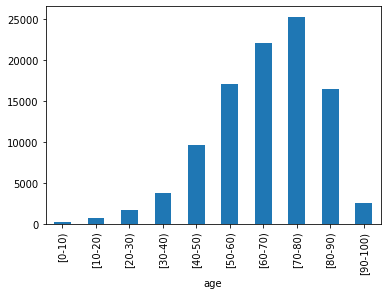

In [26]:
df.groupby('age').size().plot(kind='bar')

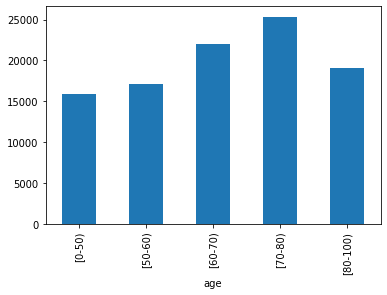

In [27]:
#We create new categories to have a more balanced distribution
df['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in df['age']], index=df.index)
df['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in df['age']], index=df.index)

df.groupby('age').size().plot(kind='bar')

And we don't forget our disguised numerical columns that are actually categorical.

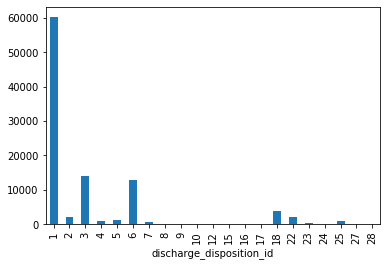

In [28]:
#We group them as we did for medical specialties, by checking the category with the highest frequence
df.groupby('discharge_disposition_id').size().plot(kind='bar')
df['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other types' for val in df['discharge_disposition_id']], index=df.index)

In [29]:
df['admission_type_id'] = pd.Series(['Other types' if val > 3 else val for val in df['admission_type_id']], index=df.index)

In [30]:
#For the one hot encoding later, we convert the whole column to string
df['admission_type_id'] = df['admission_type_id'].astype('str')

In [31]:
df['admission_source_id'] = pd.Series(['Emergency Room' if val==7 else 'Referral' if val == 1 else 'Other types' for val in df['admission_source_id']], index=df.index)

Classifiers cannot use categorical columns as such. Categorical features need to be converted to numerical values for the classifiers to extract information from them. For that we use **one-hot encoding** that will create an array of all the different categories, assigning a value of 1 for the categories that the instance is in and 0 for the others.

In [32]:
df_cat = pd.get_dummies(df[cat_columns],drop_first = True)

In [33]:
df_cat.head()

race_Asian  race_Caucasian  race_Hispanic  race_Not provided  race_Other  \
0           0               1              0                  0           0   
1           0               1              0                  0           0   
2           0               0              0                  0           0   
3           0               1              0                  0           0   
4           0               1              0                  0           0   

   gender_Male  gender_Unknown/Invalid  age_[50-60)  age_[60-70)  age_[70-80)  \
0            0                       0            0            0            0   
1            0                       0            0            0            0   
2            0                       0            0            0            0   
3            1                       0            0            0            0   
4            1                       0            0            0            0   

   ...  metformin-rosiglitazone_Steady  metformin-pioglitazone_Steady  \
0  ...                               0                              0   
1  ...                               0                              0   
2  ...                               0                              0   
3  ...                               0                              0   
4  ...                               0                              0   

   change_No  diabetesMed_Yes  admission_type_id_2  admission_type_id_3  \
0          1                0                    0                    0   
1          0                1                    0                    0   
2          1                1                    0                    0   
3          0                1                    0                    0   
4          0                1                    0                    0   

   admission_type_id_Other types  discharge_disposition_id_Other types  \
0                              1                                     1   
1                              0                                     0   
2                              0                                     0   
3                              0                                     0   
4                              0                                     0   

   admission_source_id_Other types  admission_source_id_Referral  
0                                0                             1  
1                                0                             0  
2                                0                             0  
3                                0                             0  
4                                0                             0  

[5 rows x 107 columns]

We created a lot of new features from the previous ones based on the categories they contain. We will use these for the classification problem so we can discard the ones we used to create them.

In [34]:
df.drop(cat_columns, axis=1, inplace = True)

In [35]:
cat_columns = df_cat.columns

In [36]:
#This is the final dataset that we will use for the modelling
df = pd.concat([df,df_cat], axis = 1)

In [37]:
df.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 1   
1                  0                 0                 0                 9   
2                  2                 0                 1                 6   
3                  0                 0                 0                 7   
4                  0                 0                 0                 5   

   label  race_Asian  ...  metformin-rosiglitazone_Steady  \
0      0           0  ...                               0   
1      0           0  ...                               0   
2      0           0  ...                               0   
3      0           0  ...                               0   
4      0           0  ...                               0   

   metformin-pioglitazone_Steady  change_No  diabetesMed_Yes  \
0                              0          1                0   
1                              0          0                1   
2                              0          1                1   
3                              0          0                1   
4                              0          0                1   

   admission_type_id_2  admission_type_id_3  admission_type_id_Other types  \
0                    0                    0                              1   
1                    0                    0                              0   
2                    0                    0                              0   
3                    0                    0                              0   
4                    0                    0                              0   

   discharge_disposition_id_Other types  admission_source_id_Other types  \
0                                     1                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   

   admission_source_id_Referral  
0                             1  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 116 columns]

Before proceeding to the modelling part, we look at how much our variables are correlated to each other by plotting the correlation matrix.

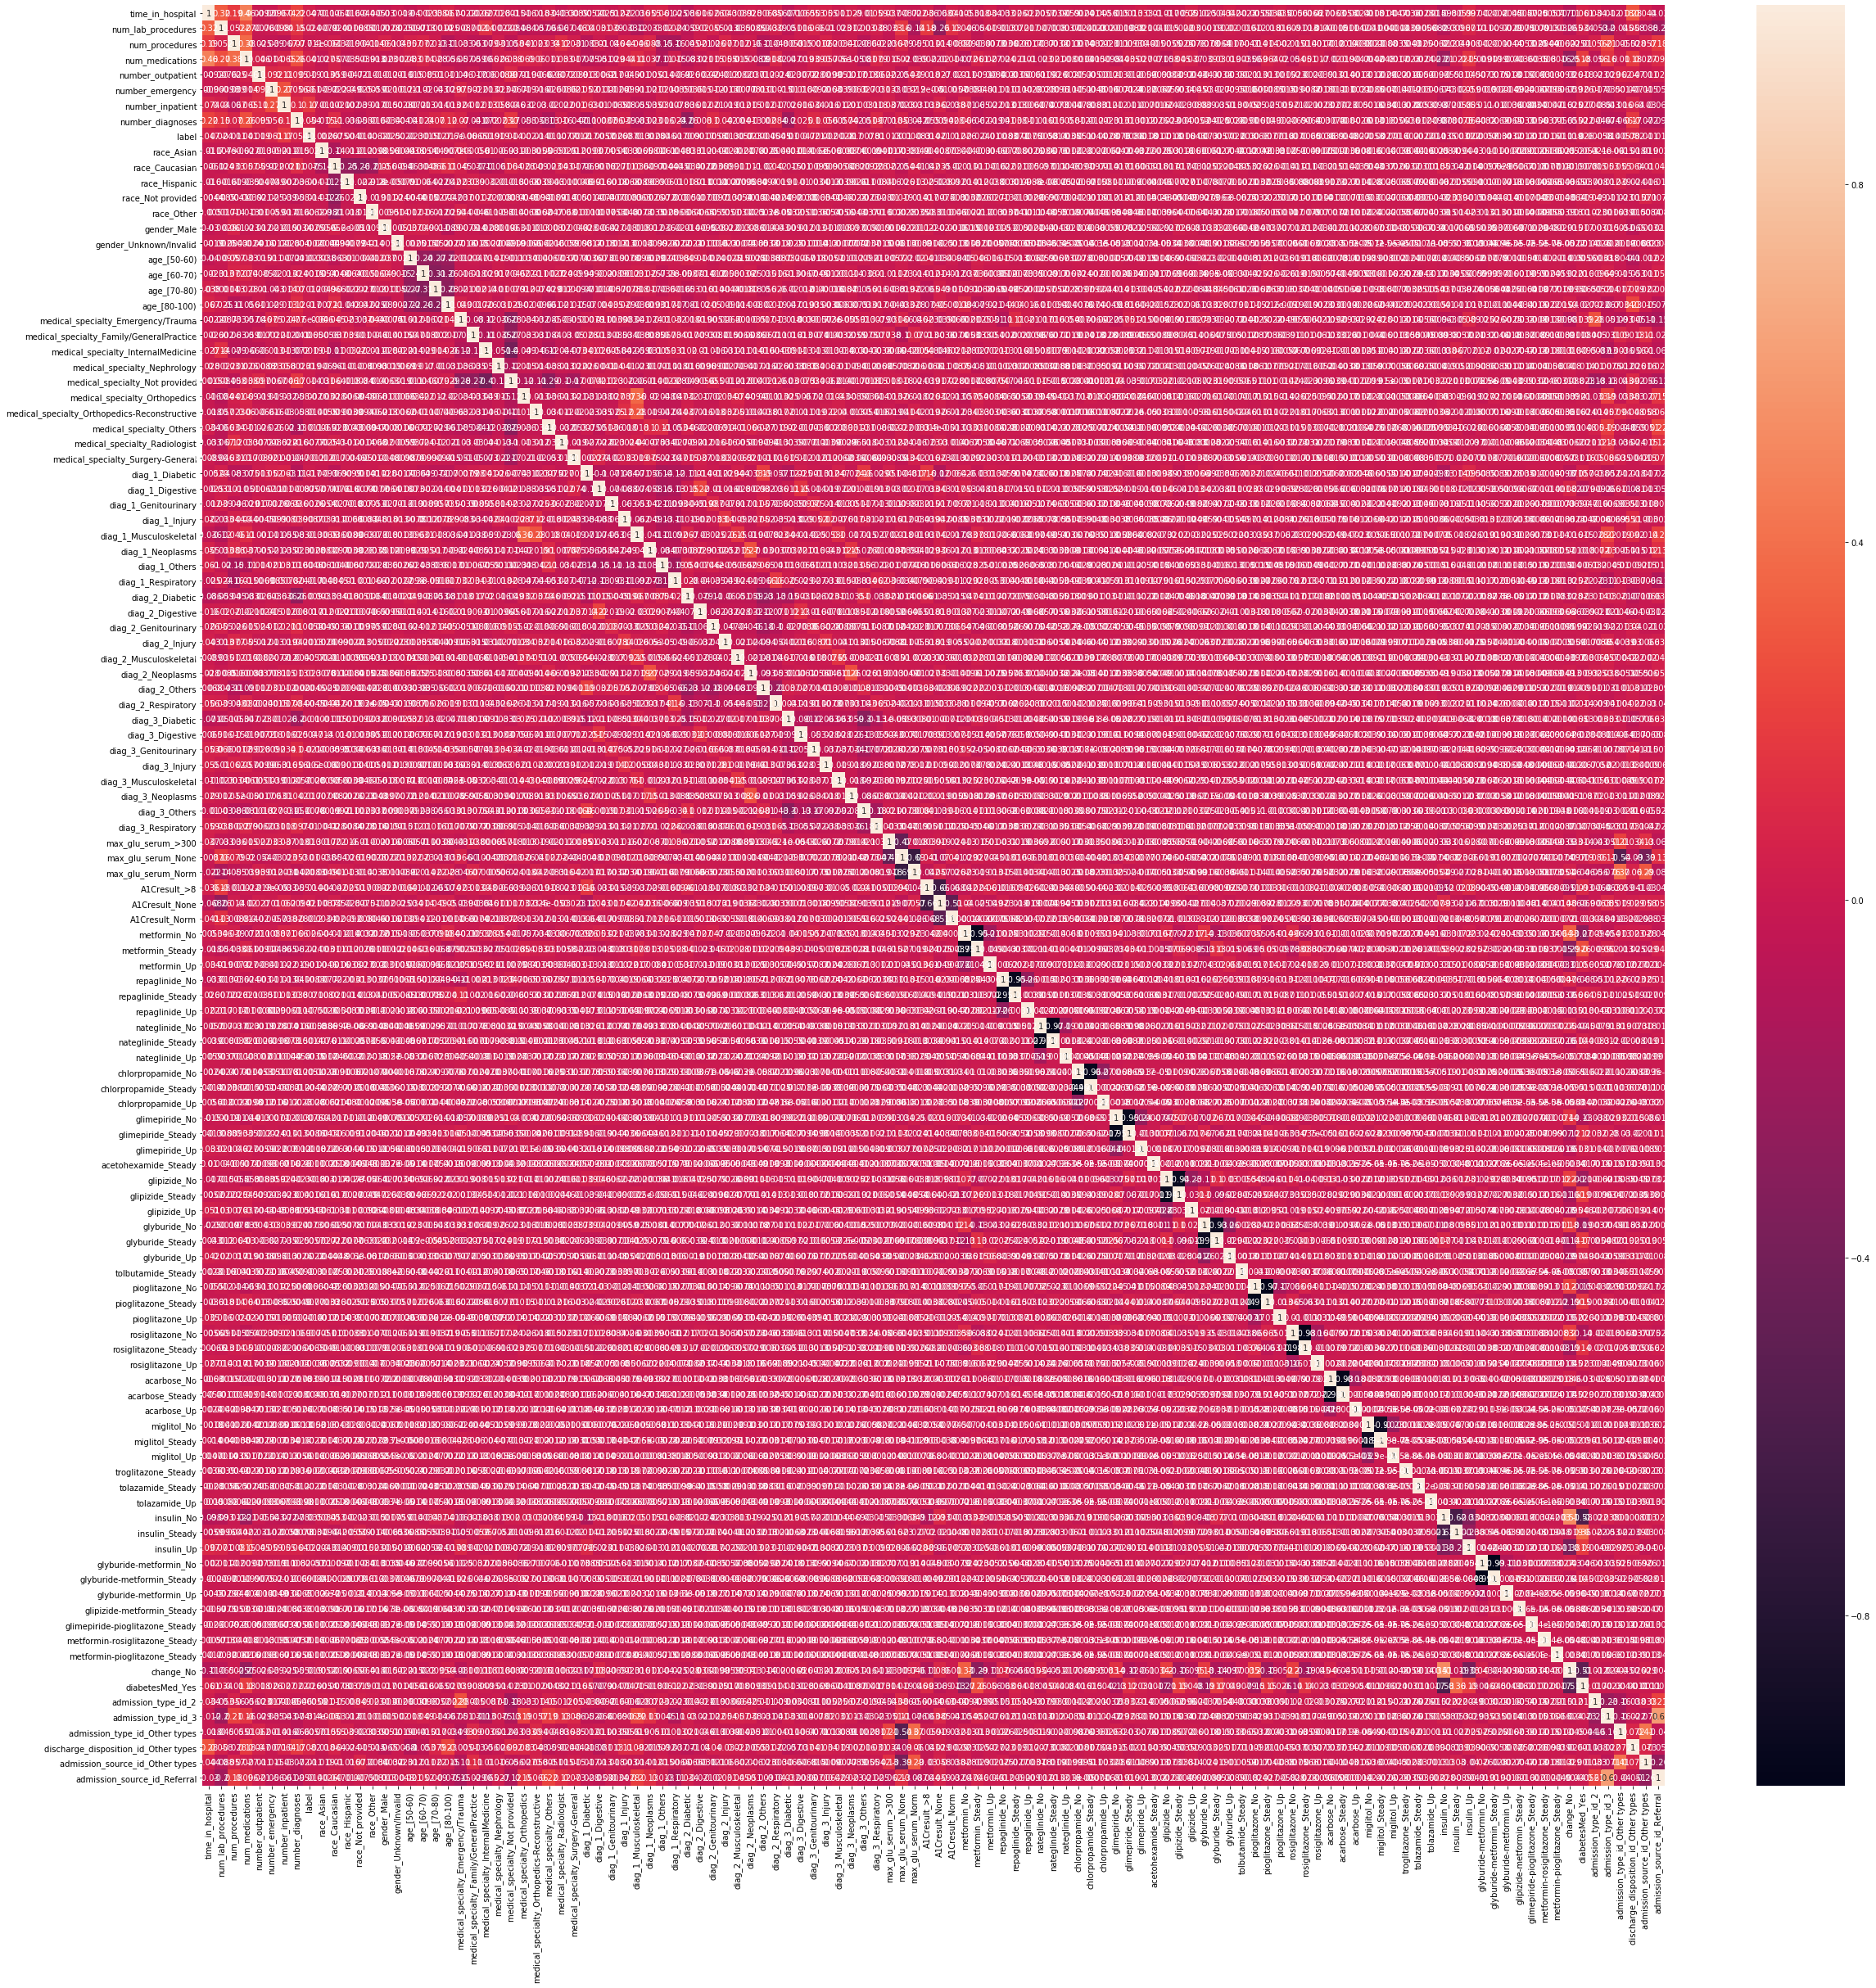

In [38]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, annot=True)

This is interesting, we see that the correlations are hovering around 0, meaning there is very little correlation between our variables. This is good to know when deciding which model to use for our prediction.

## Modeling and evaluation

It is only now that we can start to model our data. Let's divide the dataset into the features and the target.

In [39]:
X = df.loc[:, df.columns != 'label'].values
y = df[label_column].values

But we need to keep in mind that we have an **imbalanced dataset**! And this **imbalance needs to be reflected in the training and test sets in order for both to represent correctly our dataset** and hence train and test our model accordingly. 

In [40]:
#We look at the proportions of 'readmitted within 30 days' against the whole set
sum(df.label.values)/len(df.label.values)

0.11388824577474005

So we have 11% of patients that are readmitted within 30 days in our dataset. We make sure that this is reflected in our training and test data.

In [41]:
#We divide into a training and test set with 30% dedicated to testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
sum(y_train)/len(y_train)

0.11311475409836065

In [43]:
sum(y_test)/len(y_test)

0.1156930510351307

Ok, now that we made sure that the dataset was correctly represented by the training and test sets, we need to deal with this imbalance. The idea is to **upsample** our training set by finding the kNN of minority class observations (here 'readmitted within 30 days'), randomly choosing one of them and use it to create similar observations. This is what the *SMOTE* algorithm does. 

It is important to upsample on our training set only because, as the goal of model evaluation is to see how well the model performs on unseen data, we could tweak the evaluation if we ended with the same observations in the training and test sets. And we definitely don't want that.

In [44]:
#First, we normalize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
#We apply the upsampling algorithm
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=12)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [46]:
#We check the target data before and after the upsampling to see if the number of instances in the minority class has been balanced out
#Before upsampling
y_train_df = pd.DataFrame(y_train)
y_train_df.groupby(0).size()

0
0    61674
1     7866
dtype: int64

In [47]:
#After upsampling
y_train_res_df = pd.DataFrame(y_train_res)
y_train_res_df.groupby(0).size()

0
0    61674
1    61674
dtype: int64

In [48]:
#With the proportion of the minority class being balanced as well
sum(y_train_res)/len(y_train_res)

0.5

Now finally goes the modelling part. So why did we do all this one-hot encoding and preprocessing instead of just using Random Forests or Decision Trees that can handle categorical values? First, because we need to try different algorithms to check which one performs the best and most classifiers cannot handle categorical variables and second, because when we think of binary classification with low correlations between the predictors, we think of **Logistic Regression**, which cannot handle categorical values.

In [49]:
#Build a Logistic Regression model for predicting if a patient will be readmitted within 30 days to the hospital or not 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
#Parameters determined by GridSearchCV. The code was not put in the workflow due to its long computational time 
#Put at the end of the notebook as info
LR = LogisticRegression(solver='liblinear')
LR = LR.fit(X_train_res, y_train_res)
y_pred_LR = LR.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_LR))

Logistic Regression Accuracy: 0.6384256618461229


The accuracy is not very high... But we know that this is not the only important metrics to use. Before moving to the complete evaluation of our model, let's try to model our data using Random Forests.

In [50]:
#Build a RF classification model for predicting if a patient will be readmitted within 30 days to the hospital or not 
from sklearn.ensemble import RandomForestClassifier
#Parameters determined by GridSearchCV. The code was not put in the workflow due to its long computational time 
RF_clf = RandomForestClassifier(max_depth = 6, n_estimators=100, random_state = 2)
RF_clf = RF_clf.fit(X_train_res, y_train_res)
y_pred_RF = RF_clf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_RF))

Random Forest Accuracy: 0.7854578398147838


The good thing with these two models is that they are **highly interpretable**. Logistic Regression assigns a coefficient to each variable and the value of this coefficient depends on the importance of the variable in the learning process. If we extract those coefficients, we can make a list of the importance of the features and see which ones have more weights. Random Forest has a 'feature importances' function that we can directly call to retrieve this information. Let's look at the 50 first most important features for each model.

In [52]:
#The importance is stored in the coefficients of Logistic Regression
feature_importances = pd.DataFrame(LR.coef_[0], index = df.loc[:, df.columns != 'label'].columns, columns=['importance']).sort_values('importance', ascending=False)

#The importance is extracted via the feature importances function for Random Forest 
importances_RF = RF_clf.feature_importances_
indices_RF = np.argsort(importances_RF)
features_RF = df.loc[:, df.columns != 'label'].columns
#We take the 50 first features for RF
first_indices_RF = indices_RF[50:]

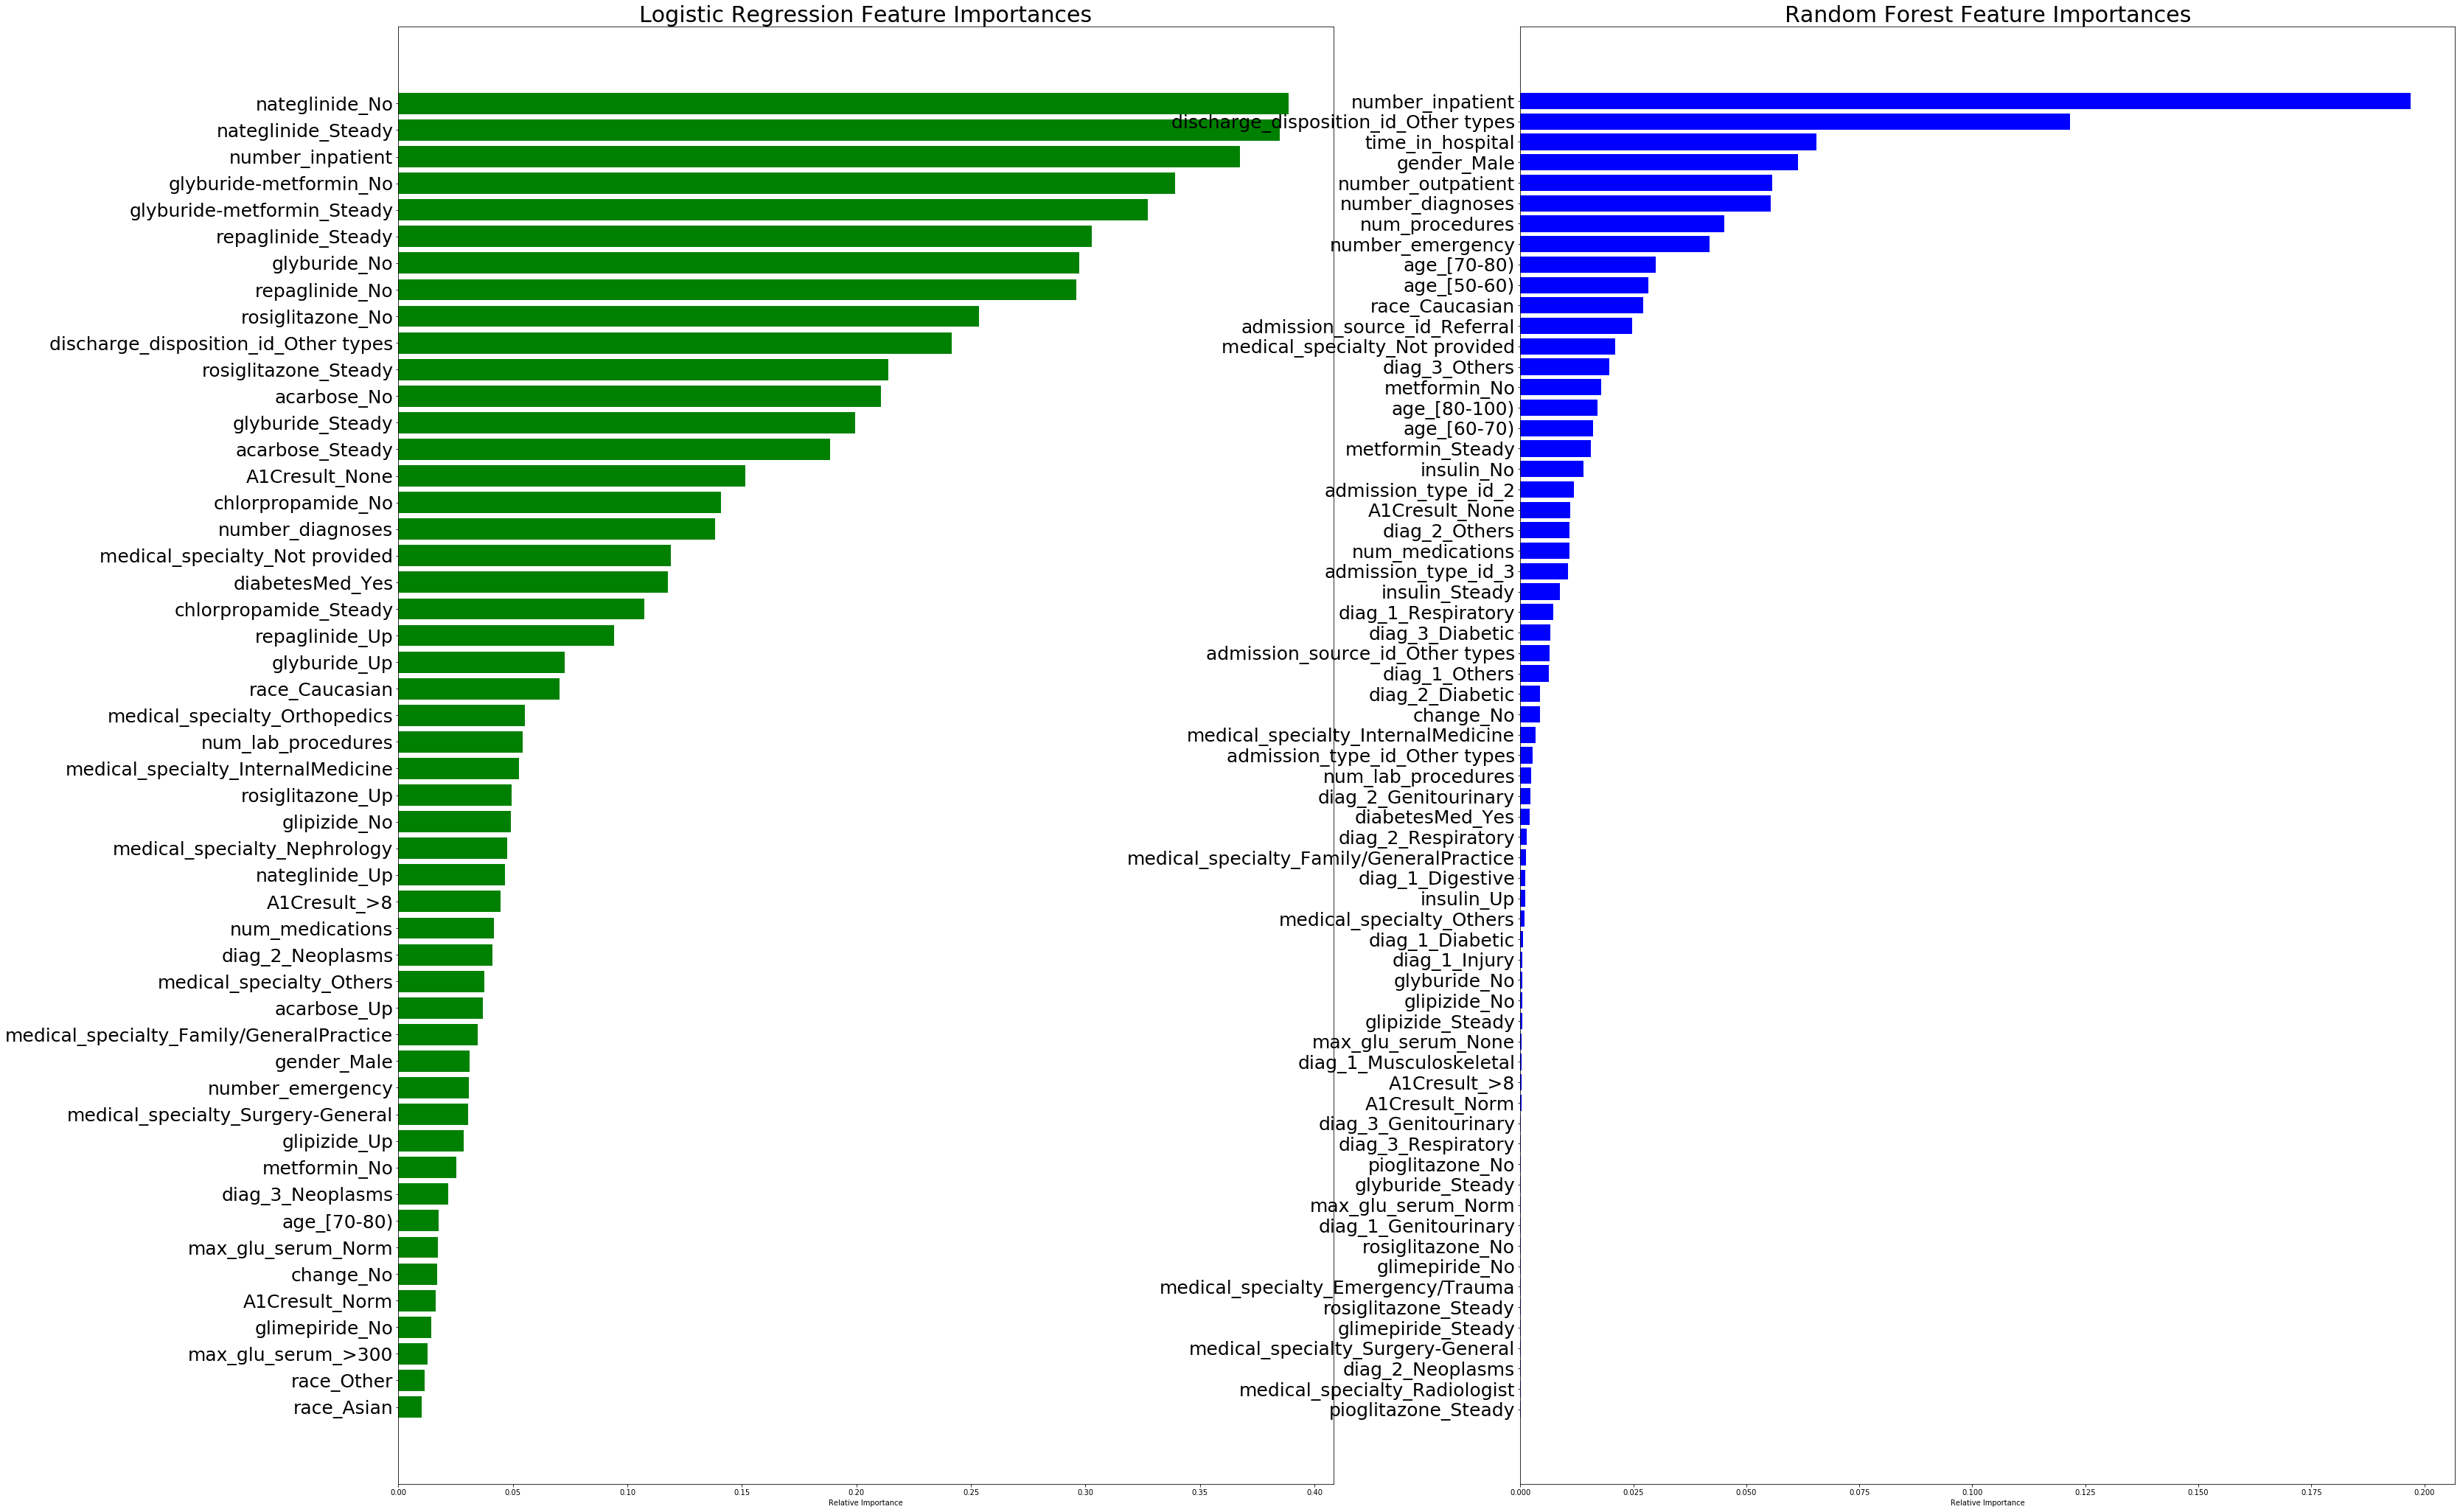

In [54]:
#We take the 50 first features for LR
ylocs = np.arange(50)
importances_LR = feature_importances.iloc[:50].values.ravel()[::-1]
features_LR = list(feature_importances.iloc[:50].index)[::-1]

plt.figure(figsize=(50,80))
ax = plt.subplot(2,2,1)
plt.title('Logistic Regression Feature Importances', size=30)
plt.barh(ylocs, importances_LR, color='g')
plt.yticks(ylocs, features_LR, size=25)
plt.xlabel('Relative Importance')

ax = plt.subplot(2,2,2)
plt.title('Random Forest Feature Importances', size=30)
plt.barh(range(len(first_indices_RF)), importances_RF[first_indices_RF], color='b')
plt.yticks(range(len(first_indices_RF)), [features_RF[i] for i in first_indices_RF], size=25)
plt.xlabel('Relative Importance')
plt.show()

This is interesting as we can understand the learning process of the model. **Logistic Regression learns more from the diabetes medication change whereas Random Forest focus on the hospitalization part (time spent, discharge information etc)**. Both considers the number of visits from hospitalized patients in the last year, important. Let's evaluate these models. First we look at their classification reports to assess the precision and recall.

In [55]:
class_names_str = ['0', '1']
print('Classification report for Logistic Regression')
print(classification_report(y_test, y_pred_LR, target_names=class_names_str))
print('Classification report for Random Forest')
print(classification_report(y_test, y_pred_RF, target_names=class_names_str))

Classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     26355
           1       0.17      0.56      0.26      3448

    accuracy                           0.64     29803
   macro avg       0.55      0.60      0.51     29803
weighted avg       0.83      0.64      0.70     29803

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     26355
           1       0.20      0.28      0.23      3448

    accuracy                           0.79     29803
   macro avg       0.55      0.57      0.55     29803
weighted avg       0.82      0.79      0.80     29803



We see how important it is to look at the other classification metrics. **Accuracy of the Random Forest might be higher, but we see that the recall for predicting our positive value is much lower than for Logistic Regression. In the scope of our problem, what is important is to identify people at risk for readmission within 30 days so a high recall for this class is really important.** Let's look at the confusion matrix.

In [56]:
#Function to plot the normalized and not normalized confusion matrix
#Code taken from scikit-learn 'https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html'
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]

    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

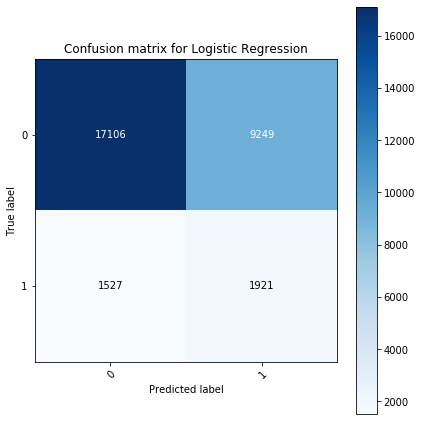

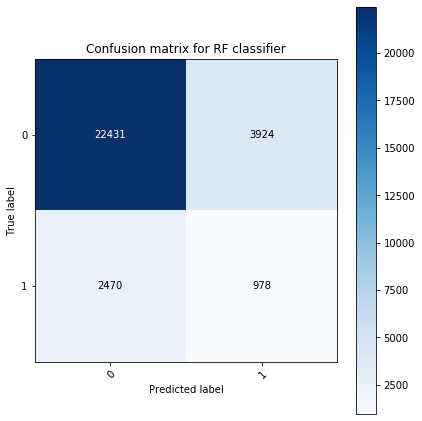

In [57]:
from sklearn.metrics import confusion_matrix
class_names = [0,1]
plot_confusion_matrix(y_test, y_pred_LR, classes=class_names,
                      title='Confusion matrix for Logistic Regression')
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names,
                      title='Confusion matrix for RF classifier')
plt.show()

Indeed, we see that Logistic Regression correctly identified 1921 patients to be readmitted within 30 days whereas Random Forests identified correctly only 978. We also see that, indeed, Random Forest is more performant at predicting who is not going to be readmitted, but this is not what we are interested in. Let's try a last model, a Neural Network, which tends to perform nicely when dealing with a large number of features.

In [58]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [66]:
num_epochs = 150
learning_rate = 0.001

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_res.shape[1],300)
        self.fc2 = nn.Linear(300,20)
        self.fc3 = nn.Linear(20,1)
    def forward(self, x):
        x = F.relu(self.fc3(F.relu(self.fc2(F.relu(self.fc1(x))))))
        return x
    
net = Net()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = Variable(torch.Tensor(X_train_res), requires_grad=True)
    targets = Variable(torch.Tensor(y_train_res))

    # Forward pass
    outputs = net(inputs)
    targets = targets.unsqueeze(1)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/150], Loss: 0.3638
Epoch [10/150], Loss: 0.3126
Epoch [15/150], Loss: 0.2588
Epoch [20/150], Loss: 0.2508
Epoch [25/150], Loss: 0.2415
Epoch [30/150], Loss: 0.2391
Epoch [35/150], Loss: 0.2343
Epoch [40/150], Loss: 0.2325
Epoch [45/150], Loss: 0.2299
Epoch [50/150], Loss: 0.2277
Epoch [55/150], Loss: 0.2256
Epoch [60/150], Loss: 0.2232
Epoch [65/150], Loss: 0.2209
Epoch [70/150], Loss: 0.2183
Epoch [75/150], Loss: 0.2156
Epoch [80/150], Loss: 0.2126
Epoch [85/150], Loss: 0.2095
Epoch [90/150], Loss: 0.2060
Epoch [95/150], Loss: 0.2024
Epoch [100/150], Loss: 0.1987
Epoch [105/150], Loss: 0.1948
Epoch [110/150], Loss: 0.1907
Epoch [115/150], Loss: 0.1865
Epoch [120/150], Loss: 0.1822
Epoch [125/150], Loss: 0.1777
Epoch [130/150], Loss: 0.1730
Epoch [135/150], Loss: 0.1682
Epoch [140/150], Loss: 0.1633
Epoch [145/150], Loss: 0.1584
Epoch [150/150], Loss: 0.1533


In [67]:
predicted = net(Variable(torch.Tensor(X_test)))
y_pred_NN = predicted.detach().numpy()

Now let's look at the ROC curve of each model and their respective AUC. This measure is very good as it basically tells **how much a model is capable of distinguishing between classes**. 

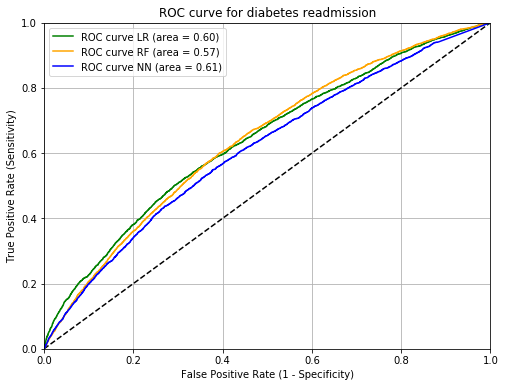

In [68]:
from sklearn import metrics
y_prob_LR = LR.predict_proba(X_test)[:, 1]
y_prob_RF = RF_clf.predict_proba(X_test)[:, 1]
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, y_prob_LR)
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_prob_RF)
fpr_NN, tpr_NN, thresholds_NN = metrics.roc_curve(y_test, y_pred_NN)
roc_auc_LR = roc_auc_score(y_test, y_pred_LR)
roc_auc_RF = roc_auc_score(y_test, y_pred_RF)
roc_auc_NN = roc_auc_score(y_test, y_pred_NN)
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1], color = 'black', linestyle='--')
plt.plot(fpr_LR, tpr_LR, color='green', label='ROC curve LR (area = %0.2f)' % roc_auc_LR)
plt.plot(fpr_RF, tpr_RF, color='orange', label='ROC curve RF (area = %0.2f)' % roc_auc_RF)
plt.plot(fpr_NN, tpr_NN, color='blue', label='ROC curve NN (area = %0.2f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes readmission')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='best')
plt.grid(True)

What we can say from this plot is that all AUC are pretty low, which is a sign of high bias and consequently, of underfitting. Indeed, a model picking at random the negative or the positive class will have a AUC score of 0.5, meaning our models are better, but not tremendously. Neural Network is the one performing best at the prediction, as expected, followed by Logistic Regression. 

# Conclusion

The goal of this project was to predict if a patient would be readmitted within 30 days after hospitalization. We tested 3 models: **Logistic Regression, Random Forest and Neural Network**. Among them, the Neural Network model is the best at distinguishing the positive class from the negative one with an AUC score between 0.6-0.63. Logistic Regression follows this performance with an AUC score of 0.6 and then Random Forest with 0.57. 

As mentioned in the analysis, these are pretty low scores, meaning that **our models are underfitting**. This could be solved by increasing the model complexity or adding new features. Our Neural Network can also be improved by assessing the number of epochs to use, as well as the number of layers and neurons, the activation functions and the optimizer. 

The final **choice of the model depends also on the application** we want to make with it, if it is detecting a maximum number of patients, then Neural Network is the right choice. Instead, if we want to understand why a patient is predicted to be rehospitalized and we need to understand on which features our model based its learning, then Logistic Regression is the good choice. **The choice of the algorithm will depend on the level of *interpretability* required**.

From a business point of view, the models are not good as they give low discrimination scores between our 2 classes. However, **our models are on average 1.2 better at predicting if a patient will be rehosipitalized within 30 days than if we randomly selected patients, which give them an added value from a business perspective**.

### [Additional code for GridSearchCV for LR]

In [58]:
from sklearn.metrics import make_scorer
#Info: This piece of code will take a while to run
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

parameter_grid = {'C' : [1,10], 'solver' : ['lbfgs', 'liblinear', 'sag']}


grid_search = GridSearchCV(logistic_regression,
                           param_grid=parameter_grid,
                           cv=5, scoring=make_scorer(roc_auc_score))

grid_search.fit(X_train_res, y_train_res)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
logistic_regression = grid_search.best_estimator_

/Users/charlottewaltregny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/charlottewaltregny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/charlottewaltregny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/charlottewaltregny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/charlottewaltregny/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Conver

Best score: 0.6254418393488342
Best parameters: {'C': 1, 'solver': 'liblinear'}


In [59]:
y_pred = logistic_regression.predict(X_test)
roc_auc_score(y_test, y_pred)

0.603097735012882